In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt


In [2]:
#stop_word  all are taken from the internet

stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [6]:
X_data=[]
Y_data=[]

for category in os.listdir("D:/New folder/20_newsgroups"):
    for document in os.listdir("D:/New folder/20_newsgroups/"+category):
        with open("D:/New folder/20_newsgroups/"+category +'/'+document,"rb") as f:
            X.append((document,f.read()))
            Y.append(category)

In [7]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#Describing the text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'bytes'>
<class 'list'>
('49960', b'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\r\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\r\nFrom: mathew <mathew@mantis.co.uk>\r\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\r\nSubject: Alt.Atheism FAQ: Atheist Resources\r\nSummary: Books, addresses, music -- anything related to atheism\r\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\r\nMessage-ID: <19930329115719@mantis.co.uk>\r\nDate: Mon, 29 Mar 1993 11:57:19 GMT\r\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\r\nFollowup-To: alt.atheism\r\nDistribution: world\r\nOrganization: Mantis Consultants, Cambridge. UK.\r\nApproved: news-answers-request@mit.edu\r\nSupersedes: <19930

In [10]:
#now we have to split data then make the dictionary
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y)

In [12]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

14998 5000 14998 5000


In [32]:
#making dictionary
#used exception handling because my system is unzipping data to encoded data and when trying to encode it  
dic={}
for i in range(len(X_train)):
    word=X_train[i][1].lower()
    
    try:
        words=re.split(r'\W+',word.decode("utf-8"))
        for s in words:
            if not(s.isalpha()) or s in stop_word or len(s)<=2:
                continue
            if s in dic:
                dic[s]+=1
            else:
                dic[s]=1
    except:
        continue
    
dic    
    

{'newsgroups': 15250,
 'sci': 6558,
 'space': 3494,
 'path': 15234,
 'cantaloupe': 19510,
 'srv': 24216,
 'cmu': 39249,
 'edu': 122605,
 'crabapple': 4653,
 'andrew': 3318,
 'news': 25662,
 'sei': 4671,
 'cis': 4321,
 'ohio': 11901,
 'state': 14107,
 'zaphod': 6197,
 'mps': 6896,
 'utexas': 3236,
 'csc': 309,
 'com': 37337,
 'tilde': 73,
 'mksol': 207,
 'usenet': 6206,
 'pyron': 96,
 'skndiv': 76,
 'dseg': 359,
 'dillon': 46,
 'subject': 16128,
 'food': 595,
 'sticks': 42,
 'message': 16459,
 'keywords': 1150,
 'lines': 15608,
 'sender': 8257,
 'nntp': 7010,
 'posting': 7314,
 'host': 6672,
 'reply': 3199,
 'organization': 14829,
 'vax': 452,
 'support': 1659,
 'references': 9713,
 'cso': 2273,
 'uiuc': 3000,
 'date': 15558,
 'tue': 1791,
 'apr': 15359,
 'gmt': 13269,
 'article': 10043,
 'jelson': 2,
 'rcnext': 2,
 'john': 1901,
 'elson': 2,
 'writes': 11074,
 'anyone': 3237,
 'ever': 1289,
 'heard': 1284,
 'product': 430,
 'called': 1517,
 'apparently': 381,
 'created': 458,
 'markete

In [33]:
len(dic)

94530

In [ ]:
# means number of words in vocab =94530

In [38]:
#dictionary is stored in dic
#sorting dictionary in descending order on the basis of frequency

features=sorted(dic.items(),key=operator.itemgetter(1),reverse=True)


In [39]:
features

[('edu', 122605),
 ('cmu', 39249),
 ('com', 37337),
 ('news', 25662),
 ('not', 24954),
 ('srv', 24216),
 ('cantaloupe', 19510),
 ('net', 19026),
 ('message', 16459),
 ('subject', 16128),
 ('lines', 15608),
 ('date', 15558),
 ('apr', 15359),
 ('newsgroups', 15250),
 ('path', 15234),
 ('can', 14915),
 ('organization', 14829),
 ('state', 14107),
 ('gmt', 13269),
 ('ohio', 11901),
 ('one', 11749),
 ('will', 11428),
 ('writes', 11074),
 ('article', 10043),
 ('comp', 9838),
 ('references', 9713),
 ('talk', 9224),
 ('misc', 8942),
 ('sender', 8257),
 ('ans', 8252),
 ('howland', 8174),
 ('reston', 8143),
 ('don', 7851),
 ('people', 7711),
 ('like', 7599),
 ('university', 7552),
 ('just', 7448),
 ('posting', 7314),
 ('nntp', 7010),
 ('mps', 6896),
 ('know', 6758),
 ('host', 6672),
 ('sci', 6558),
 ('get', 6509),
 ('usenet', 6206),
 ('zaphod', 6197),
 ('think', 6106),
 ('may', 6022),
 ('politics', 5967),
 ('alt', 5869),
 ('windows', 5670),
 ('also', 5608),
 ('rutgers', 5302),
 ('time', 5268),
 (

In [40]:
features

[('edu', 122605),
 ('cmu', 39249),
 ('com', 37337),
 ('news', 25662),
 ('not', 24954),
 ('srv', 24216),
 ('cantaloupe', 19510),
 ('net', 19026),
 ('message', 16459),
 ('subject', 16128),
 ('lines', 15608),
 ('date', 15558),
 ('apr', 15359),
 ('newsgroups', 15250),
 ('path', 15234),
 ('can', 14915),
 ('organization', 14829),
 ('state', 14107),
 ('gmt', 13269),
 ('ohio', 11901),
 ('one', 11749),
 ('will', 11428),
 ('writes', 11074),
 ('article', 10043),
 ('comp', 9838),
 ('references', 9713),
 ('talk', 9224),
 ('misc', 8942),
 ('sender', 8257),
 ('ans', 8252),
 ('howland', 8174),
 ('reston', 8143),
 ('don', 7851),
 ('people', 7711),
 ('like', 7599),
 ('university', 7552),
 ('just', 7448),
 ('posting', 7314),
 ('nntp', 7010),
 ('mps', 6896),
 ('know', 6758),
 ('host', 6672),
 ('sci', 6558),
 ('get', 6509),
 ('usenet', 6206),
 ('zaphod', 6197),
 ('think', 6106),
 ('may', 6022),
 ('politics', 5967),
 ('alt', 5869),
 ('windows', 5670),
 ('also', 5608),
 ('rutgers', 5302),
 ('time', 5268),
 (

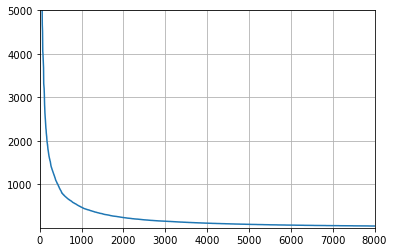

In [44]:
#plotting graph(words vs freq)
#further deciding number of features we want to take

answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [45]:
#taking top 2000 words because they have significant frequency
vocab=[features[i][0] for i in range(2000)]

In [ ]:
#now we have our vocab ready

In [52]:
#Making x_train dataset
#No. of rows is equivalent to rows in X_train, and column is equal to length 
x_train_dataset=np.zeros([len(X_train),len(vocab)],int)
for i in range(len(X_train)):
    try:
        words=X_train[i][1].lower()
        word=re.split(r'\W+',words.decode("utf-8"))
    #Iterating over each word
        for j in word:
            
        #We will add the frequency corresponding to that word only which is in our answer
            if j in vocab:
                x_train_dataset[i][vocab.index(j)]+=1
    except:
        continue

In [53]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer
x_test_dataset=np.zeros([len(X_test),len(vocab)],int)
for i in range(len(X_test)):
    try:
        words=X_test[i][1].lower()
        word=re.split(r'\W+',words.decode("utf-8"))
    #Iterating over each word
        for j in word:
        #We will add the frequency corresponding to that word only which is in our answer
            if j in vocab:
                x_test_dataset[i][vocab.index(j)]+=1
    except:
        continue

In [54]:
#Test Classification using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,Y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,Y_train))
print("Score on testing data:",clf.score(x_test_dataset,Y_test))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Score on training data: 0.8909854647286305
Score on testing data: 0.8602
[[217   0   1   0   0   0   0   2   1   0   0   0   0   0   1   1   0   1
    0  39]
 [  0 186  13   9   6   5   8   1   4   0   0   1   3   1   3   0   0   0
    0   0]
 [  0   5 218  16   4  12   4   0   0   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   4   2 218  27   0   3   0   1   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   2   1  21 229   0   3   0   5   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  23  22   9   6 181   1   0   0   0   0   1   1   0   3   0   0   0
    0   0]
 [  0   0   0   3   1   0 241   9   3   0   0   0   1   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0   9 258   6   1   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   6 217   1   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   2   7 230   4   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   3  13 223   0   0   0   0   0   0   0
   

# INPLEMENTING THE MULTINOMIAL NAIVE BYTES

In [90]:

def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    
    classes=set(y_train)
    
    for i in classes:
        temp=0
        #selecting X_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in vocab:
            #Calculating total word in feature
            l=(x_train_with_i[:,vocab.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

#count is the dictionary which is actually storing data for probability evaluation

In [91]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [92]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [93]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
        
    return y_pred

In [94]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [95]:
#x_train_dataset contains the feature side of train data and y_train contains the class 
dictionary=fit(x_train_dataset,Y_train)

In [96]:
#predicting for training and testing data
y_pred_training=predict_(x_train_dataset,dictionary)
y_pred_testing=predict_(x_test_dataset,dictionary)

In [97]:
s1=score(Y_train,y_pred_training)
s2=score(Y_test,y_pred_testing)
s1,s2

(0.9027870382717695, 0.8712)

In [98]:
print(confusion_matrix(Y_test,y_pred_testing))
print(classification_report(Y_test,y_pred_testing))

[[224   0   1   0   0   0   0   3   1   0   0   0   1   1   0   0   0   1
    1  30]
 [  0 208   5  10   3   1   3   0   3   0   0   3   3   0   1   0   0   0
    0   0]
 [  0  17 182  29   4  20   3   0   0   0   0   2   1   0   0   0   0   0
    2   0]
 [  0   7   1 220  22   1   5   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0  16 236   0   4   0   5   0   0   0   1   2   0   0   0   0
    0   0]
 [  0  25  14   8   3 191   2   0   0   0   0   2   1   0   1   0   0   0
    0   0]
 [  0   0   0   4   0   0 241   9   3   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   8 263   3   1   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3 222   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   5 233   6   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   3   7 228   0   0   0   0   0   0   0
    0   0]
 [  0   4   0   0   0   1   0   0   0   0   0 238   6   0   0   0

In [99]:
# comparisn of scores
print("score of inbuit classifier:")
print("Score on training data:",clf.score(x_train_dataset,Y_train))
print("Score on testing data:",clf.score(x_test_dataset,Y_test))
print("-----------------")
print("score of self implementation: ")
s1=score(Y_train,y_pred_training)
s2=score(Y_test,y_pred_testing)
print("Score on training data:",s1)
print("Score on testing data:",s2)

score of inbuit classifier:
Score on training data: 0.8909854647286305
Score on testing data: 0.8602
-----------------
score of self implementation: 
Score on training data: 0.9027870382717695
Score on testing data: 0.8712
